# Smart Cities Workshop 2017

In [49]:

### MODA module
import sys
sys.path.append('code/')

## Open source tools
import pandas as pd
import matplotlib
import seaborn
import folium

## some functions MODA wrote to help automate simple tasks like geocoding
from MODA import GeoHelper


## enabling charts 
%matplotlib inline
matplotlib.style.use('seaborn-talk')


#### Preprocessing of PLUTO data I've already done to save time

## What is PLUTO?

Primary Land Use Tax Lot Output [(PLUTO!)](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page) is published by the Department of City Planning PLUTO is a record of every lot of land in the city. 


Data Dictionary [here](https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?r=16v2)



Note: I've done one bit of prep work that combined all five borough files into a single table. 

In [28]:
PLUTO = pd.read_csv('PLUTO_processed.csv')

PLUTO.head()

,Unnamed: 0,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,...,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,BUILDING_CAT
0,1,BK,1,50,302,21.0,2000.0,13.0,33.0,11201.0,...,12d,NaN,302 007,30101.0,E-231,0.0,NaN,1,16V2,E
1,17,BK,7,21,302,21.0,2008.0,13.0,33.0,11201.0,...,12d,NaN,302 006,30101.0,NaN,0.0,NaN,1,16V2,G
2,20,BK,16,5,302,21.0,1001.0,13.0,33.0,11201.0,...,12d,NaN,302 006,30101.0,NaN,0.0,NaN,1,16V2,Q
3,21,BK,16,17,302,21.0,1001.0,13.0,33.0,11201.0,...,12d,NaN,302 006,30101.0,NaN,0.0,NaN,1,16V2,Q
4,22,BK,18,1,302,21.0,2002.0,13.0,33.0,11201.0,...,12d,NaN,302 006,30101.0,E-231,0.0,NaN,1,16V2,D


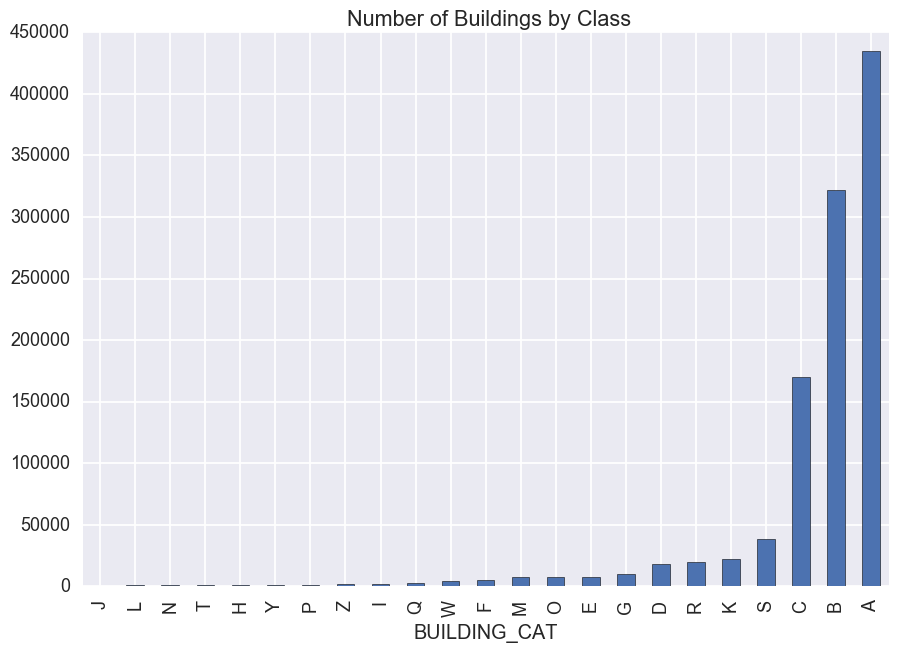

In [20]:
PLUTO.groupby('BUILDING_CAT')['NumBldgs'].sum().sort_values().plot(kind = 'bar', title = ' Number of Buildings by Class')

### What is the oldest building in NYC? 

[Spoiler](https://en.wikipedia.org/wiki/John_Bowne_House)

In [52]:
## Several buildings have year built '0' so I have to ignore those
PLUTO = PLUTO[PLUTO.YearBuilt >= 1000]


print 'The oldest building in PLUTO was built in ' + str(PLUTO.YearBuilt.min()) 

print 'The address is ' + PLUTO[PLUTO.YearBuilt == PLUTO.YearBuilt.min()].Address

The oldest building in PLUTO was built in 1661
503202    The address is 37-01 BOWNE STREET
Name: Address, dtype: object


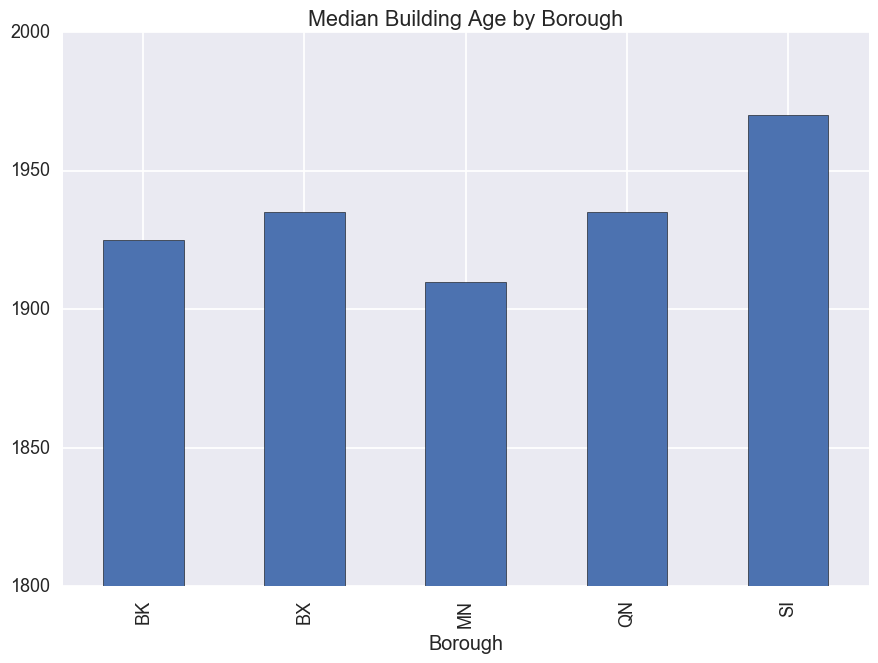

In [32]:
age = PLUTO.groupby('Borough')['YearBuilt'].median().plot(kind = 'bar', title = 'Median Building Age by Borough')
age = age.set_ylim(1800,2000)

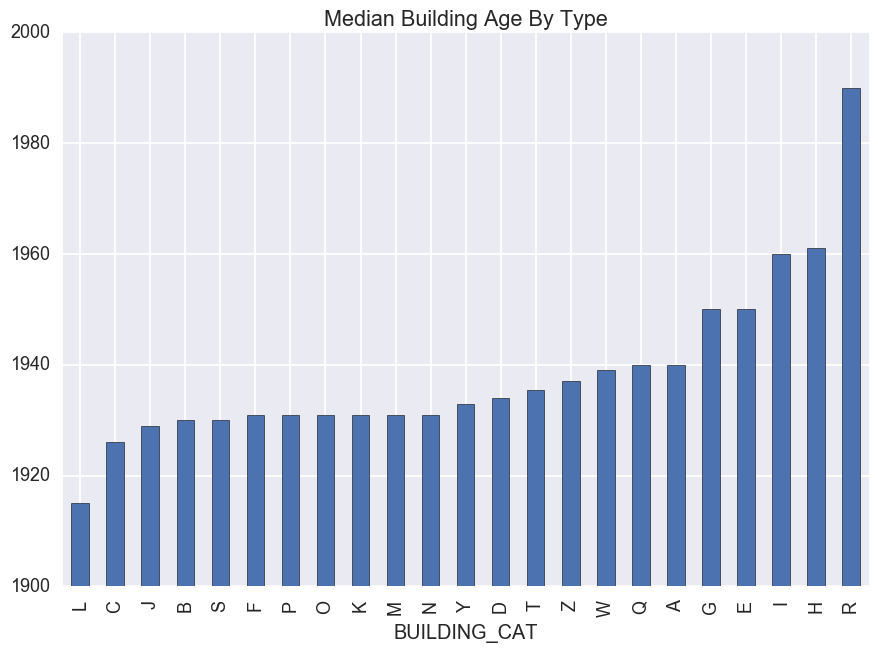

In [34]:
age = PLUTO.groupby('BUILDING_CAT')['YearBuilt'].median().sort_values().plot(kind = 'bar',\
                        title = 'Median Building Age By Type')

age = age.set_ylim(1900,2000)

## A real-world example: Broadband Internet Access

MODA and the CTO's office collaborated to study the state of internet access for New Yorkers:

* [Many New Yorkers cannot afford broadband internet today](https://moda-nyc.carto.com/viz/1234cd1a-1fb0-11e7-ab3c-0e05a8b3e3d7/public_map)

* Public Wifi is still sparsely accessibly outside of Manhatten (LINK)



### Many options to expand affordable and fast internet to all New Yorkers. Can you think of a few?  



















  ...


In [40]:
City_Owned = PLUTO[PLUTO.OwnerType == 'C'] 
Tallest_Facilities = City_Owned.ix[City_Owned.groupby('ZipCode').NumFloors.idxmax()]

Tallest_Facilities[['ZipCode', 'Address', 'OwnerName','NumFloors']]

,ZipCode,Address,OwnerName,NumFloors
359929,10001.0,340 8 AVENUE,DCAS/DEPARTMENT OF ED,10.00
350289,10002.0,227 MADISON STREET,HEALTH AND HOSPITALS,14.00
361920,10003.0,38 IRVING PLACE,DCAS/DEPARTMENT OF ED,9.00
348512,10004.0,44 BEAVER STREET,SANITATION,12.00
350247,10005.0,42 SOUTH STREET,NYC PARKS,2.00
348450,10006.0,25 WEST STREET,MTA BRIDGES & TUNNELS,8.00
348903,10007.0,1 CENTRE STREET,NYC DCAS,39.00
351389,10009.0,282 EAST 3 STREET,NYC DHS,6.00
363704,10010.0,25-00 F D R DRIVE,WATERSIDE PLAZA LP,40.00
359875,10011.0,233 WEST 24 STREET,DCAS/DEPARTMENT OF ED,11.00


In [42]:
geoID = 'fb9ad04a'
geoKey = '051f93e4125df4bae4f7c57517e62344'

f = GeoHelper(geoID,geoKey)
Tallest_Facilities = f.GetLatLong(Tallest_Facilities)

found ID column: BBL


In [47]:

my_map = folium.Map(location=[40.7128 , -74.0059],tiles='Stamen Toner')

Tallest_Facilities.apply(lambda x: folium.Marker(location = [x['Latitude'], x['Longitude']]\
                                                 ,popup  = x['Address']).add_to(my_map) , axis = 1)

my_map